In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def coordinate_descent(fundfun, gamma0, x0, maxit=None, *args):
    # Coordinate search method
    '''
    Inputs: 
    fundfun:    a function handle, which evaluates the objective function.
    gamma0:     the step length.
    x0:         the starting point.
    maxit:      the maximum number of iterations.
    args:       the parameters in fundfun.

    Outputs:
    x_result:   the solution, if the algorithm converges.
    stat:       a structure array. 
                stat.converged shows if the algorithm converges.
                stat.iter gives the number of iterations.
                stat.X saves all iterate including the starting point.
                stat.F saves all objective function values.
                stat.nfun saves the number of function evaluations.
    '''

    # Determine if x0 is a scalar or an array
    x = np.array(x0, ndmin=1)
    is_scalar = x.size == 1

    # Solver settings and info
    maxit = maxit if maxit is not None else 10000
    tol = 1.0e-6
    n = len(x0)
    I = np.eye(n)

    stat = {"converged": False, "nfun": 0, "iter": 0, "X": [x.copy()], "F": []}

    # Initial iteration
    gamma = gamma0
    it = 0
    f = fundfun(x, *args)
    converged = (gamma <= tol)
    stat["nfun"] += 1
    stat['F'].append(f)

    # Main loop of coordinate search
    while not converged and it < maxit:
        it += 1

        # TODO -- evaluate the function values for all points in D_k,
        #         then update x or reduce gamma
        # ======================================

        perturbations = [[gamma, 0], [0, gamma], [-gamma, 0], [0, -gamma]]

        # Evaluate the function at each perturbed coordinate and store the results in a dictionary
        f_values = {fundfun(x + p): x + p for p in perturbations}

        # Find the minimum f value and the corresponding x coordinate
        min_f = min(f_values.keys())
        if min_f < f:
            f = min_f
            x = f_values[min_f]  # Update x with the coordinate that produced min_f
        else:
            gamma = 1/2 * gamma
        
        # ======================================

        converged = (gamma <= tol)

        stat['X'].append(x)
        stat['F'].append(f)

    stat['iter'] = it
    # Prepare return data
    if not converged:
        stat['converged'] = converged
        return None, stat
    stat['converged'] = converged
    # Convert the solution back to a scalar if the input was a scalar
    x_result = x[0] if is_scalar else x
    return x_result, stat


In [77]:
def rosenbrock(x):
    return np.min(100*(x[1] - x[0]**2)**2 + (1-x[0])**2)

In [78]:
gamma0 = 1
x0 = [-1.2, 1]
xopt, stat = coordinate_descent(rosenbrock, gamma0, x0)

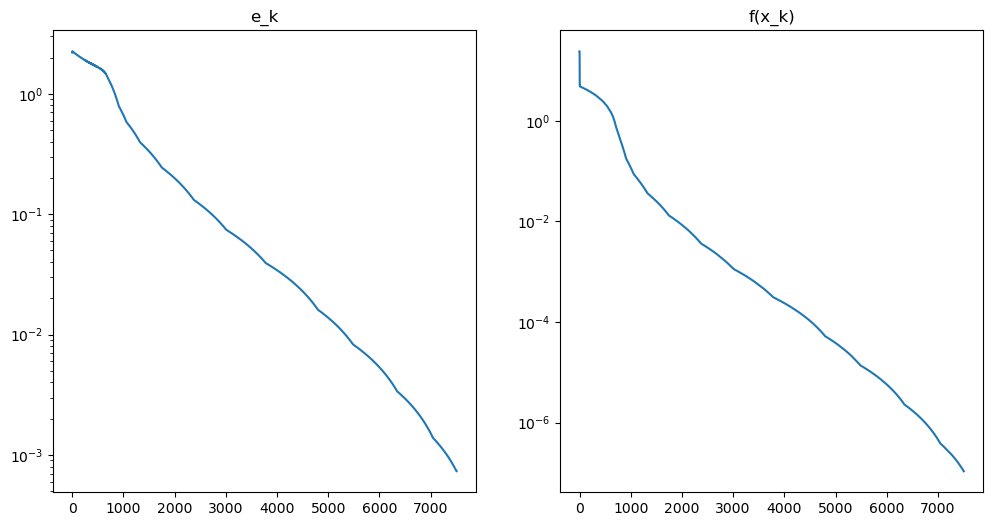

In [79]:
x_true = [1,1]
err = np.sqrt((1-np.array(stat['X'])[:, 0])**2 + (1-np.array(stat['X'])[:, 1])**2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.semilogy(err)
plt.title('e_k')

plt.subplot(1, 2, 2)
plt.semilogy(stat['F'])
plt.title('f(x_k)')

plt.show()

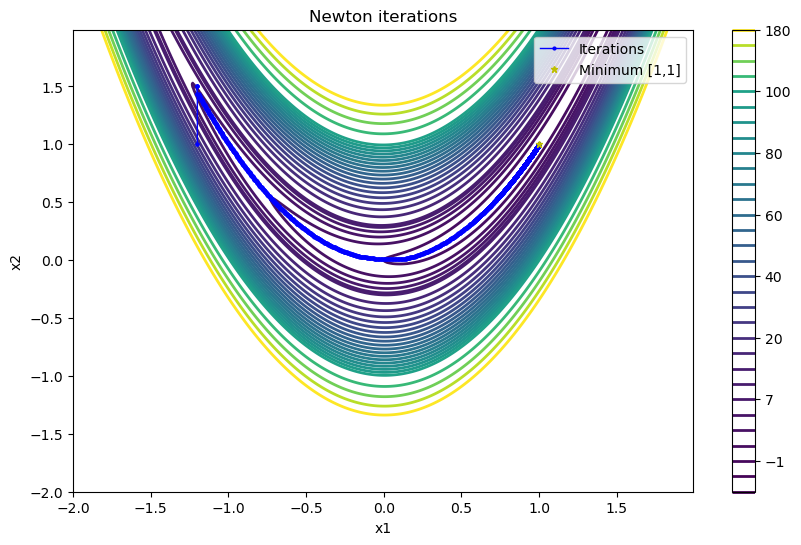

In [80]:
def plot_rosenbrock_contour():
    x1 = np.arange(-2, 2, 0.01)
    x2 = np.arange(-2, 2, 0.01)
    X, Y = np.meshgrid(x1, x2)
    Z = 100*(Y - X**2)**2 + (1 - X)**2

    fig, ax = plt.subplots(figsize=(10, 6))
    v = np.concatenate((np.arange(-5, 10, 2), np.arange(10, 100, 5), np.arange(100, 200, 20)), axis=None)
    c = ax.contour(X, Y, Z, v, linewidths=2)
    fig.colorbar(c, ax=ax)

    ax.set_title("Newton iterations")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    
    return fig, ax

def plot_iterates(stat, ax, label, color, linewidth, markersize):
    X = np.array(stat['X'])
    ax.plot(X[:, 0], X[:, 1], color=color, marker='o', markersize=markersize, label=label, linewidth=linewidth)

x0 = np.array([-1.2, 1])
gamma0 = 1
xopt, stat = coordinate_descent(rosenbrock, gamma0, x0, maxit=None)

fig, ax = plot_rosenbrock_contour()
plot_iterates(stat, ax, label="Iterations", color='blue', linewidth=1, markersize=2)

ax.plot(1, 1, 'y*', markersize=5, label='Minimum [1,1]')
plt.legend()
plt.show()